In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt


## Step :01 Load Data

In [3]:
#Loading the heart_disease_uci dataset
train_data = pd.read_csv('..\data\heart_disease\data_train.csv')
test_data = pd.read_csv('..\data\heart_disease\data_test.csv')
train_data.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,sex_0.0,sex_1.0,dataset_0.0,...,restecg_2.0,exang_0.0,exang_1.0,slope_0.0,slope_1.0,slope_2.0,thal_0.0,thal_1.0,thal_2.0,num
0,881,62,148.68,170.00,120.00,3.000,1.0,0,1,0,...,1,0,1,1,0,0,0,0,1,1
1,458,54,150.00,213.74,122.00,0.000,0.0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,798,51,135.82,339.00,130.62,3.066,2.0,0,1,0,...,0,0,1,0,1,0,0,0,1,1
3,26,50,120.00,219.00,158.00,1.600,0.0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
4,85,52,120.00,325.00,172.00,0.200,0.0,0,1,1,...,0,1,0,0,0,1,0,1,0,0


In [4]:
train_data.shape

(736, 31)

In [6]:
#Splitting the data into features and target
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]

X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]
X_train.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,sex_0.0,sex_1.0,dataset_0.0,...,restecg_1.0,restecg_2.0,exang_0.0,exang_1.0,slope_0.0,slope_1.0,slope_2.0,thal_0.0,thal_1.0,thal_2.0
0,881,62,148.68,170.00,120.00,3.000,1.0,0,1,0,...,0,1,0,1,1,0,0,0,0,1
1,458,54,150.00,213.74,122.00,0.000,0.0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
2,798,51,135.82,339.00,130.62,3.066,2.0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
3,26,50,120.00,219.00,158.00,1.600,0.0,1,0,1,...,1,0,1,0,0,1,0,0,1,0
4,85,52,120.00,325.00,172.00,0.200,0.0,0,1,1,...,1,0,1,0,0,0,1,0,1,0


# Scaling

Standard Scaler

This method transforms values to follow a standard normal distribution with a mean of 0 and a standard deviation of 1.
z = x - mean / standard deviation

In [7]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [8]:
#removing nan values and infinetes
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
y_train = np.nan_to_num(y_train)
y_test = np.nan_to_num(y_test)



## 5. Modeling
- Using Grid search cv to find and fitthe best model

In [9]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

# Define parameter grids for each model
param_grid = [
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30]
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [None, 10, 20, 30]
    },
    {
        'model': [XGBClassifier()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 6, 9]
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7, 9]
    }
]

# Create a pipeline
pipeline = Pipeline([
    ('model', RandomForestClassifier())
])

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
print("Best model and parameters:", grid_search.best_params_)

# Predict using the best model
y_pred = best_model.predict(X_test)

#creating a csv file for the best model's prediction as traditional.csv
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])
y_pred.to_csv('results/traditional.csv', index=False)

# Checking the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model is:", accuracy)

# Checking the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix is:", conf_matrix)

Best model and parameters: {'model': RandomForestClassifier(), 'model__max_depth': 30, 'model__n_estimators': 50}
Accuracy of the best model is: 0.8804347826086957
Confusion matrix is: [[67  8]
 [14 95]]


c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [0.89403383 0.89404302 0.8926549  0.89270086 0.89133113 0.8994852
 0.88587056 0.88587976 0.89132193 0.90082736 0.89269167 0.89402464
 0.8559294  0.85320831 0.8451002  0.84776613 0.87905865 0.88313109
 0.88448244 0.88587976 0.89404302 0.88996139 0.88722192 0.89945762
 0.89130355        nan        nan        nan        nan]
  warnings.warn(


# Findings
- Best model : Randomforestclassifier with depth 20 and 200 estimators

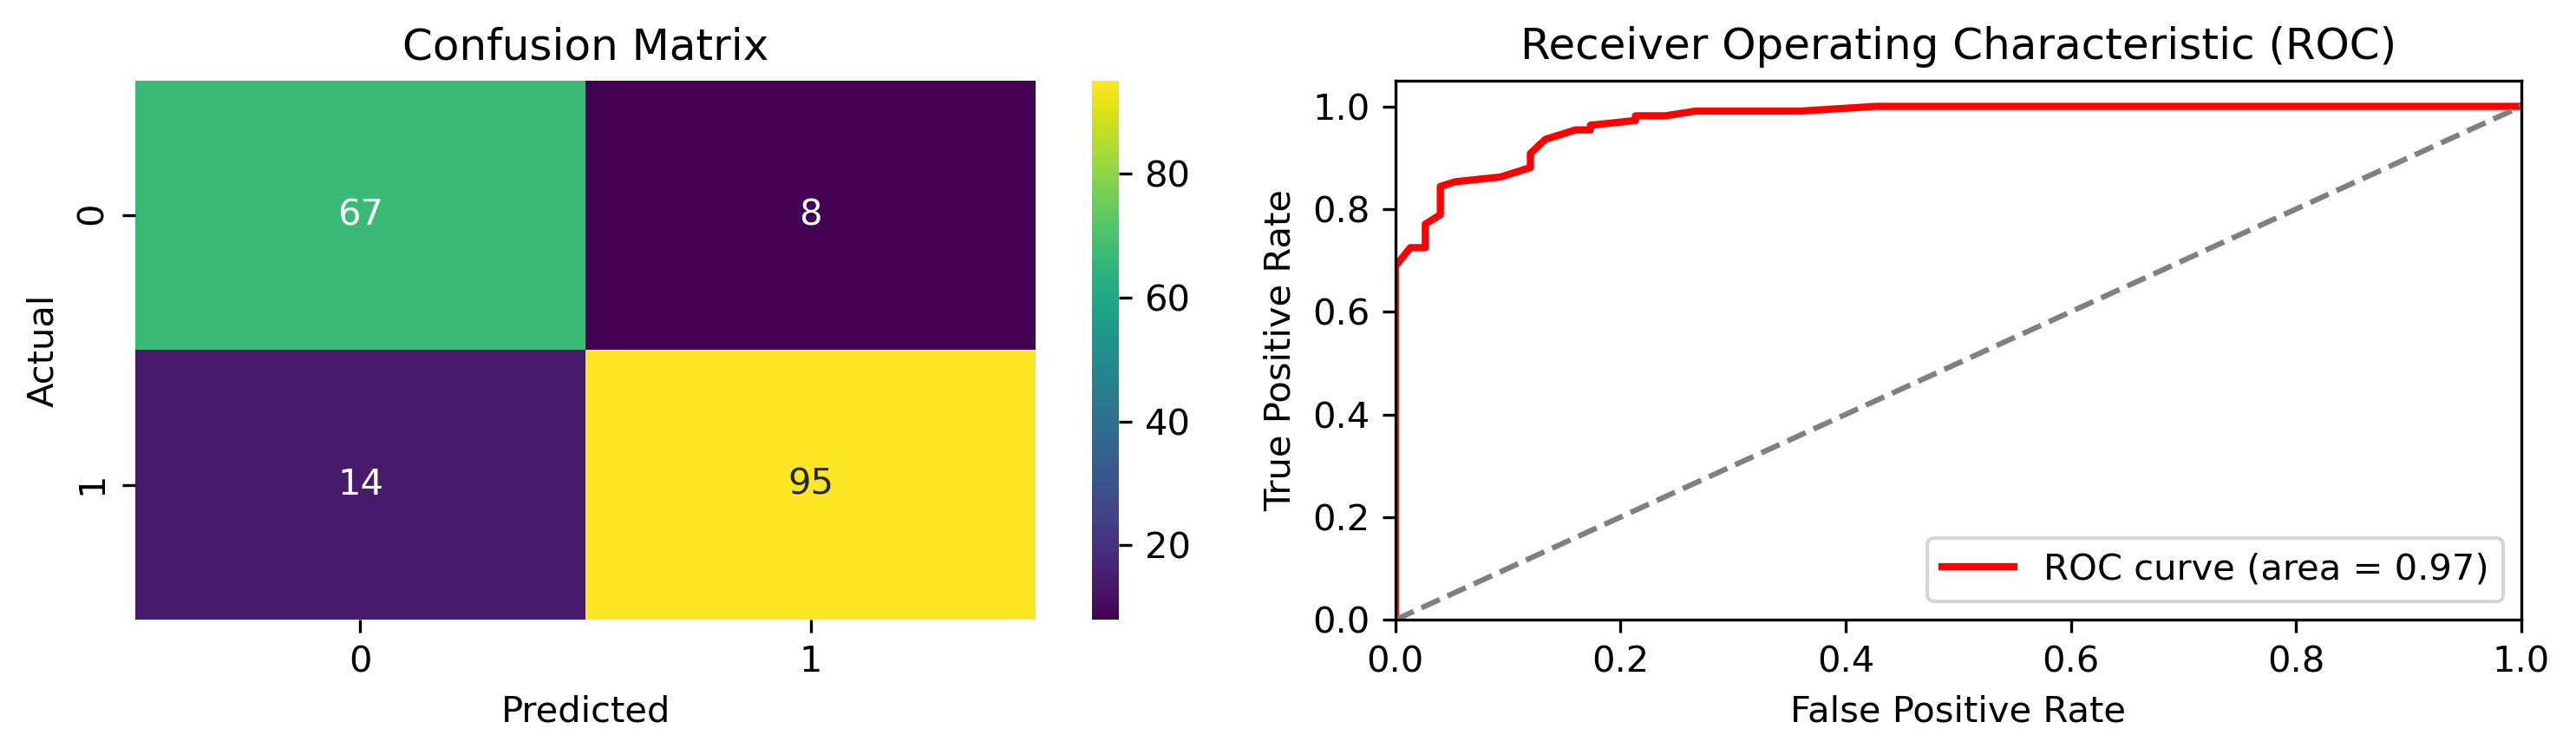

In [10]:
from sklearn.metrics import   roc_auc_score, roc_curve

# Predict probabilities and compute ROC-AUC
y_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

The notebook has predicted for the test set and will return the prediction later
